In [61]:
import numpy
import pandas
import matplotlib
import seaborn
import tensorflow
import keras

In [89]:
import dataexp as dtex 
import dataio as dtio 
import preprocessing as pre 
import feature_extraction as fe 
from sklearn.manifold import TSNE
from sklearn import metrics

In [62]:
#auto encoding
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.auto_encoder import AutoEncoder

from pyod.utils.utility import *

In [63]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
import seaborn as sns
%matplotlib inline

####### Deep learning libraries
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
# ANN Visualizer is a great visualization python library used to work with Keras. 
# It uses python’s graphviz library to create a presentable graph of the neural network 
# you are building.
from ann_visualizer.visualize import ann_viz
# 
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support, matthews_corrcoef)
#
from IPython.display import display, Math, Latex

In [84]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    for i in range(0,y1.astype('int32').max()+1):
        plt.scatter(X_t[np.where(abs(y1) == i), 0], X_t[np.where(abs(y1) == i), 1], marker='o', color=plt.cm.nipy_spectral(i / 10.), linewidth='1', alpha=0.8, label='{}_label'.format(i))
        
    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();

In [64]:

x_train_o = pd.read_csv('financial_data.csv')
y_train_o = pd.read_csv('revealed_businesses.csv')
# unlabelled test data
x_test_o = pd.read_csv("testing_data.csv")

x_test_business_id = x_test_o['Var1']

# replace missing values
x_train_o.replace('?', np.nan, inplace=True)
x_train_o = x_train_o.astype('float64')
x_train_o = x_train_o.fillna(x_train_o.mean())

x_test_o.replace('?', np.nan, inplace=True)
x_test_o = x_test_o.astype('float64')
x_test_o = x_test_o.fillna(x_train_o.mean())

data_all = x_train_o.merge(y_train_o, on='Var1', how = 'left')
data_all_id = data_all['Var1']

In [65]:
print(x_train_o.shape)
print(y_train_o.shape)
print(x_test_o.shape)
print(data_all.shape)

(9003, 65)
(4879, 2)
(1500, 65)
(9003, 66)


In [66]:
data_all.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66
0,18399.0,0.023954,0.150120,0.395670,3.63570,54.043,0.028822,0.031029,4.56831,1.01120,0.68579,0.031029,0.206700,0.046350,0.031029,748.92,0.487370,6.6614,0.031029,0.019658,38.335,1.10510,0.027054,0.015169,0.045436,0.68579,0.440170,0.17331,0.871110,3.9905,0.027224,0.019658,35.100,10.3990,0.18022,0.027054,1.61780,81.138963,0.68579,0.017139,0.72617,0.071334,0.017139,101.000,62.663,0.144430,2.53140,38.763,-0.015080,-0.009553,3.6357,0.150120,0.096165,1.50990,1.50990,3871.001,0.011041,0.034914,0.98896,0.000000,9.5214,5.8248,34.713,10.5150,3.4752,0.0
1,15092.0,0.049699,0.065808,0.726800,12.94400,233.110,0.000000,0.063192,14.19601,0.89618,0.93419,0.064611,1.038500,0.079257,0.063192,338.17,1.079300,15.1960,0.063192,0.070513,72.291,0.59206,0.038997,0.055445,0.633790,0.88395,0.874140,27.47900,3.422700,4.0807,-0.508100,0.070514,26.353,13.8500,12.80700,0.053381,0.89618,81.138963,0.93419,0.059565,8.70660,0.046838,0.043515,105.020,32.729,0.279950,10.02700,76.870,0.031161,0.034771,11.9690,0.060851,0.072201,4.39940,4.39940,8751.901,0.059565,0.053189,0.93169,0.000000,5.0492,11.1520,24.784,14.7270,4.2204,NaN
2,19821.0,-0.356310,0.392880,0.158840,1.40430,-2.619,-0.085597,-0.356320,1.54531,0.92963,0.60712,-0.355270,-0.906940,-0.270190,-0.356320,-570.91,-0.639330,2.5453,-0.356320,-0.383290,65.049,3.72560,-0.355270,-0.383290,-0.424140,-0.13646,-0.639330,-337.82000,0.354320,2.4509,0.071085,-0.382270,131.530,2.7750,2.77500,-0.160620,0.92963,81.138963,0.60712,-0.172770,0.83263,-0.052357,-0.382160,88.182,23.132,-2.150700,0.98259,55.466,-0.460410,-0.495260,1.4043,0.392880,0.360360,1.35430,1.35430,44.859,-0.172770,-0.586910,1.38330,0.000000,5.6112,15.7790,154.260,2.3662,2.0738,0.0
3,14171.0,0.001417,0.708110,-0.052312,0.88978,-31.198,0.269520,0.001407,0.41222,1.96540,0.29189,0.031043,0.002964,0.019329,0.001407,6803.70,0.053647,1.4122,0.001407,0.000716,21.344,0.79908,0.030593,0.000716,0.099538,0.27613,0.053647,1.03230,-0.090556,3.8024,0.329700,0.000716,88.100,4.1430,2.77700,-0.001052,1.96540,1.412700,0.50949,-0.000535,0.12667,0.351380,0.015566,67.266,45.922,0.012242,0.64765,21.332,-0.005988,-0.003047,0.5964,0.474630,0.241370,0.50528,0.88196,-331.879,-0.000535,0.004820,0.99930,0.745480,17.1011,7.9482,88.147,4.1408,3.4021,NaN
4,12900.0,0.020041,0.346520,0.335930,2.76130,39.050,0.000000,0.020031,1.88591,1.29750,0.65348,0.020867,0.105030,0.093182,0.020031,1046.10,0.348920,2.8859,0.020031,0.015438,37.371,0.79278,0.010807,0.015438,0.322610,0.60721,0.348920,12.92600,0.709690,5.0555,0.191060,0.031723,68.121,5.3581,2.94910,0.098042,1.29750,699.160000,0.65405,0.075560,1.05800,0.103420,0.008329,91.389,54.018,0.150780,2.06480,47.450,-0.090068,-0.069415,1.5198,0.190720,0.186630,1.38060,1.38170,38170.001,0.212410,0.030652,0.80158,0.000862,9.7670,6.7570,53.651,6.8032,2.7412,NaN


In [67]:
data_all_y = data_all.Var66

In [68]:
data_nolabel = data_all[data_all.Var66.isnull()]
data_label = data_all[data_all.Var66.notnull()]

# data_nolabel_v = data_nolabel.drop(columns=['Var1', 'Var66'])
# data_nolabel_v_f = data_nolabel_v.fillna(data_nolabel_v.mean())
# data_nolabel_id = data_nolabel['Var1']

# data_label_v = data_label.drop(columns=['Var1', 'Var66'])
# data_label_v_f = data_label_v.fillna(data_label_v.mean())
# data_label_id = data_label['Var1']

In [69]:
X_train = data_label[data_label['Var66'] == 0]
X_train = X_train.drop(['Var1','Var66'], axis=1)

# all the labelled data
y_test = data_label['Var66']
X_test = data_nolabel
X_test  = data_nolabel.drop(['Var1'], axis=1)

In [71]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled  = scaler.transform(X_test)

In [72]:
print('*'*50)
print('start cluster based detecion...')
print('*'*50)

**************************************************
start cluster based detecion...
**************************************************


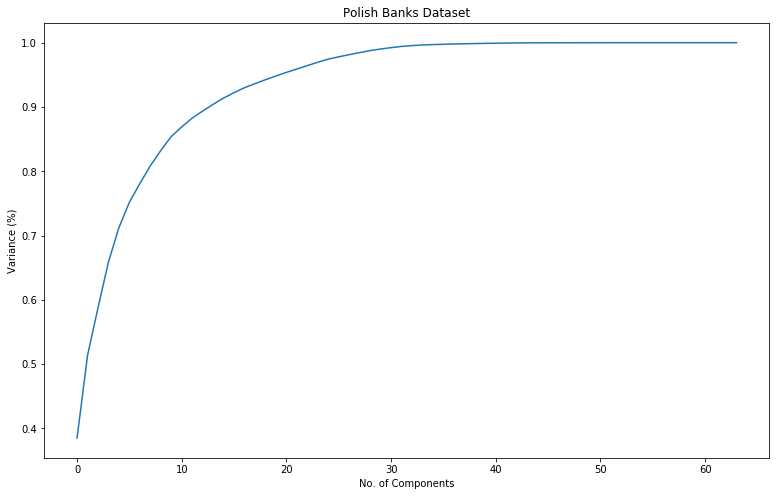

In [79]:

# apply PCA 
pca_instance = PCA(n_components = None, whiten = False, svd_solver = "auto", random_state = 42) 

pca_instance.fit(X_train_scaled)
# plot components and variance 
plt.figure(figsize=(13,8))
com_var = np.cumsum(pca_instance.explained_variance_ratio_) 
plt.plot(com_var)
plt.xlabel("No. of Components")
plt.ylabel("Variance (%)")
plt.title("Polish Banks Dataset")
plt.show()

In [80]:

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

data = X_test_scaled
#label = y_test.values

# Take useful feature and standardize them
# data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
# min_max_scaler = preprocessing.StandardScaler()
# np_scaled = min_max_scaler.fit_transform(data)
# data = pd.DataFrame(np_scaled)

# reduce to 30 importants features
pca = PCA(n_components=30)
X_pca = pca.fit_transform(data)
# standardize these 30 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(X_pca)
X_pca_scaled = pd.DataFrame(np_scaled)


In [82]:
label = np.zeros(X_test_scaled.shape[0])

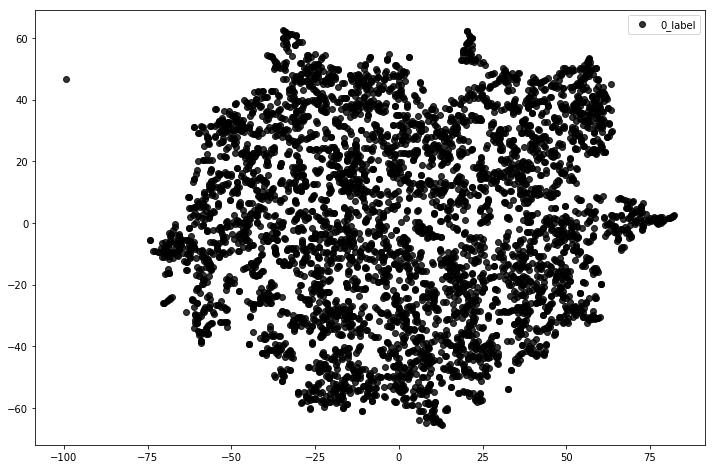

In [85]:
tsne_plot(X_pca_scaled, label, "label_pca.png")

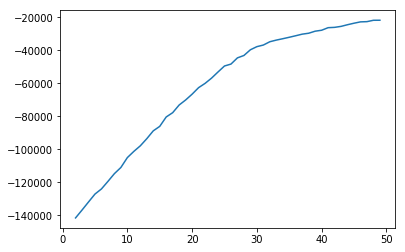

In [88]:
# clustering
#  calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(2, 50)
kmeans = [KMeans(n_clusters=i).fit(X_pca_scaled) for i in n_cluster]
scores = [kmeans[i].score(X_pca_scaled) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

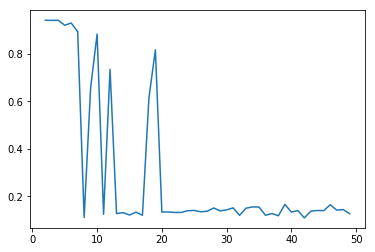

In [90]:
scores = [metrics.silhouette_score(X_pca_scaled, kmeans[i].labels_) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [95]:
pd.DataFrame(kmeans[9].labels_)[0].value_counts()

1     2545
0     2324
8        2
7        1
3        1
10       1
6        1
2        1
9        1
5        1
4        1
Name: 0, dtype: int64

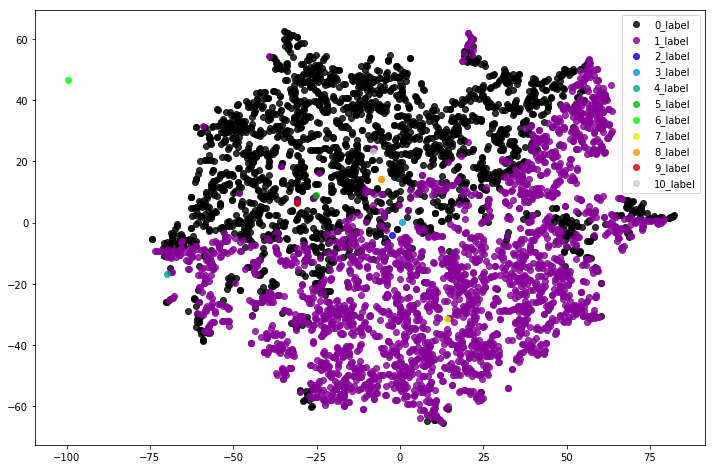

In [91]:
tsne_plot(X_pca_scaled, kmeans[9].labels_, "label_pred_pca.png")

In [54]:
# Not clear for me, I choose 30 centroids arbitrarily and add these data to the central dataframe

Dict = {
        'cluster':kmeans[30].predict(X_pca_scaled),
        'label':y_test.values,
                 'principal_feature1':X_pca_scaled[0],
                 'principal_feature2':X_pca_scaled[1],
                 'principal_feature3':X_pca_scaled[2],
                 'principal_feature4':X_pca_scaled[3],
                 'principal_feature5':X_pca_scaled[4],
                 'principal_feature6':X_pca_scaled[5],
                 'principal_feature7':X_pca_scaled[6],
                 'principal_feature8':X_pca_scaled[7],
                 'principal_feature9':X_pca_scaled[8],
                 'principal_feature10':X_pca_scaled[9],
                 'principal_feature11':X_pca_scaled[10],
                 'principal_feature12':X_pca_scaled[11],
                 'principal_feature13':X_pca_scaled[12],
                 'principal_feature14':X_pca_scaled[13],
                 'principal_feature15':X_pca_scaled[14],
                 'principal_feature16':X_pca_scaled[15],
                 'principal_feature17':X_pca_scaled[16],
                 'principal_feature18':X_pca_scaled[17],
                 'principal_feature19':X_pca_scaled[18],
                 'principal_feature20':X_pca_scaled[19],
                 'principal_feature21':X_pca_scaled[20],
                 'principal_feature22':X_pca_scaled[21],
                 'principal_feature23':X_pca_scaled[22],
                 'principal_feature24':X_pca_scaled[23],
                 'principal_feature25':X_pca_scaled[24],
                 'principal_feature26':X_pca_scaled[25],
                 'principal_feature27':X_pca_scaled[26],
                 'principal_feature28':X_pca_scaled[27],
                 'principal_feature29':X_pca_scaled[28],
                 'principal_feature30':X_pca_scaled[29]
       }

# print(Dict)
df = pd.DataFrame(data=Dict)

# df['cluster'] = kmeans[29].predict(X_train_pca_scaled)
# df['principal_feature1'] = X_train_pca_scaled[0]
# df['principal_feature2'] = X_train_pca_scaled[1]
df['cluster'].value_counts()

1     1607
27    1386
10    1382
21     250
26     198
22       8
30       6
4        5
20       4
29       4
12       3
15       3
8        2
16       2
25       2
17       2
18       1
11       1
19       1
24       1
28       1
9        1
5        1
14       1
13       1
7        1
23       1
2        1
6        1
3        1
0        1
Name: cluster, dtype: int64

In [55]:
# print(Dict)

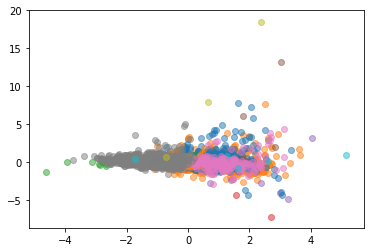

In [56]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
# colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 
#           9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey',15: 'lightgrey',
#          15:'violet', 17:'fochsia', 18:'magenta', 19:'oliverdrab', 20:'yellowgreen', 21:'coral', 22:'lightcoral', 
#           23:'gold', 24:'skyblue', 25:'hotpink', 26:'blueviolet', 27: 'navy', 28:'plum', 29:'lightcora'}
# ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))

# ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
for i in range(30):
    dff = df[df['cluster'] == i]
#     ll = len(dff)
#     colors = np.random.rand(ll)
    ax.scatter(dff['principal_feature1'], dff['principal_feature2'], alpha=0.5)
plt.show()

In [60]:
for k in range(30):
    print(k)
    label = df[df['cluster'] == k]['label'].values
    
    dff = df[df['cluster'] == k].drop(columns=['cluster', 'label'])
    
    
    ad = KMeans(n_clusters=2)#(verbose=0)
    if len(dff.values) >1:
        ad.fit(dff.values)
        y_pred = ad.labels_
    else:
        y_pred = [1]
    # get the prediction labels and outlier scores
      # binary labels (0: inliers, 1: outliers)
    #y_scores = ad.decision_scores_  # raw outlier scores

    cm = confusion_matrix(label, y_pred)
    mcc = matthews_corrcoef(label, y_pred)
    
    
    precision, recall, f1, _ = precision_recall_fscore_support(label, y_pred, average='binary')
    
    print('cluster [{0}, {1}, {2}], mcc: {3}'.format(precision, recall, f1, mcc))


0
cluster [0.0, 0.0, 0.0], mcc: 0.0
1
cluster [0.03231292517006803, 0.7450980392156863, 0.0619396903015485], mcc: 0.005434934539187083
2
cluster [0.0, 0.0, 0.0], mcc: 0.0
3
cluster [0.0, 0.0, 0.0], mcc: 0.0
4
cluster [0.0, 0.0, 0.0], mcc: -0.4082482904638631
5
cluster [0.0, 0.0, 0.0], mcc: 0.0
6
cluster [0.0, 0.0, 0.0], mcc: 0.0
7
cluster [0.0, 0.0, 0.0], mcc: 0.0
8
cluster [0.0, 0.0, 0.0], mcc: 0.0
9
cluster [0.0, 0.0, 0.0], mcc: 0.0
10
cluster [0.5, 0.0196078431372549, 0.03773584905660377], mcc: 0.0935150074574026
11
cluster [0.0, 0.0, 0.0], mcc: 0.0
12
cluster [0.0, 0.0, 0.0], mcc: 0.0
13
cluster [0.0, 0.0, 0.0], mcc: 0.0
14
cluster [0.0, 0.0, 0.0], mcc: 0.0
15
cluster [0.0, 0.0, 0.0], mcc: 0.0
16
cluster [0.0, 0.0, 0.0], mcc: 0.0
17
cluster [0.0, 0.0, 0.0], mcc: -1.0
18
cluster [0.0, 0.0, 0.0], mcc: 0.0
19
cluster [0.0, 0.0, 0.0], mcc: 0.0
20
cluster [0.0, 0.0, 0.0], mcc: 0.0
21


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/me

cluster [0.0, 0.0, 0.0], mcc: -0.0381107966983353
22
cluster [0.0, 0.0, 0.0], mcc: 0.0
23
cluster [0.0, 0.0, 0.0], mcc: 0.0
24
cluster [0.0, 0.0, 0.0], mcc: 0.0
25
cluster [0.0, 0.0, 0.0], mcc: 0.0
26
cluster [0.0, 0.0, 0.0], mcc: -0.02545139051903111
27
cluster [0.0, 0.0, 0.0], mcc: -0.0173150509304622
28
cluster [0.0, 0.0, 0.0], mcc: 0.0
29
cluster [0.0, 0.0, 0.0], mcc: 0.0


/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/superchee/anaconda3/envs/CS5228/li

In [35]:
print('*'*50)
print('end cluster based detecion...')
print('*'*50)

**************************************************
end cluster based detecion...
**************************************************


In [27]:
label_test = df[df.cluster == 1]['label'].values

In [28]:
len(df[df.cluster == 1])

1588